<a href="https://colab.research.google.com/github/GZabalaG/AIMaster/blob/main/Not_Supervised/N1_1_M%C3%A9todos_de_clustering_basados_en_particiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>N1: Métodos de clustering</h1></center>

# N1.1: Métodos de clustering basados en particiones


### RECUERDA RELLENAR TUS DATOS A CONTINUACIÓN ANTES DE HACER NADA

In [1]:
# ===============================================================#
# Rellena AQUÍ tu nombre y apellidos antes de hacer nada
# ===============================================================#

NOMBRE = 'Gonzalo'
APELLIDOS = 'Zabala García'

# ===============================================================#

En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones, como el K-means y el K-medoids.

Para empezar, cargamos las librerías que vamos a necesitar:

In [2]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Cargamos el dataset con el que vamos a trabajar:

El dataset cargado tiene 1999 instancias.


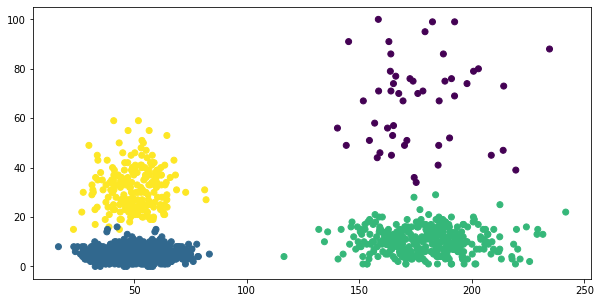

In [3]:
np.random.seed(17) # Fijamos una semilla para asegurar la reproducibilidad de la práctica

data_file_url = 'https://raw.githubusercontent.com/flifuehu/viu-unsupervised-learning/master/datasets/sinteticos/dataset_cuatro_diferente_densidad.csv'
D = np.array(pd.read_csv(data_file_url,header=0))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,0:2]
Dy = D[:,2]
print('El dataset cargado tiene',Dy.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

El algoritmo K-means tiene un único parámetro: el número de clústeres (K). Una vez fijado este valor, el primer paso consiste en elegir unos centros iniciales.

Los centros iniciales elegidos aleatoriamente son:
[[211.17006329  66.85234104]
 [ 19.10821167  57.82965542]
 [182.25889492  50.6839945 ]]


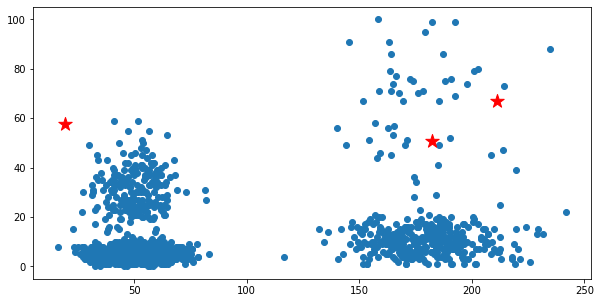

In [6]:
# Elegimos un número de clústeres a buscar
K = 3

cDx = np.zeros(K*Dx.shape[1])
cDx.shape = (K,Dx.shape[1])

def random_sample_float(n, mi, ma):
    return (ma - mi) * np.random.random_sample(n) + mi

for d in np.arange(Dx.shape[1]):
    cDx[:,d] = random_sample_float(K, np.min(Dx[:,d]), np.max(Dx[:,d]))

print('Los centros iniciales elegidos aleatoriamente son:')
print(cDx)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

Vamos ahora a implementar el algoritmo de K-means. ¡No sufráis! Es un algoritmo sencillo y vais a ser capaces sin problemas.

Recordad que el algoritmo K-means es un proceso iterativo en el que se van ajustando los grupos para producir el resultado final. 

Se parte de los datos y de una inicialización aleatoria de los centros de tantos clusters como queremos encontrar, y a partir de ahí se realizan dos operaciones iterativamente:

1.   Paso de asignación de datos

En este paso, cada elemento de nuestro dataset se asigna al centroide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

2.   Paso de actualización del centroide

En este paso se recalcula el centroide de cada cluster, teniendo en cuenta la nueva asignación calculada en el paso 1. Para ello, se calcula la media de todos los puntos asignados en el paso anterior.

$$
c_i = \frac{1}{\left | S_i \right |} \sum_{x_i \in S_i} x_i
$$

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

Vamos a implementarlo. Tenéis la estructura del bucle que realiza el proceso, y simplemente tenéis que rellenar el código que falta.



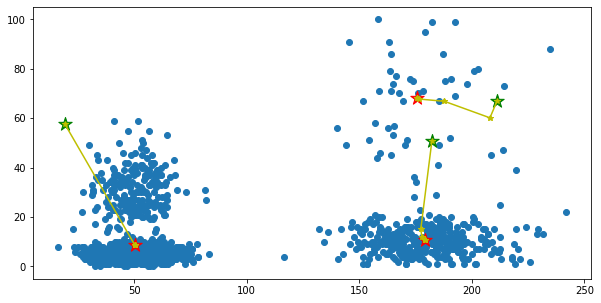

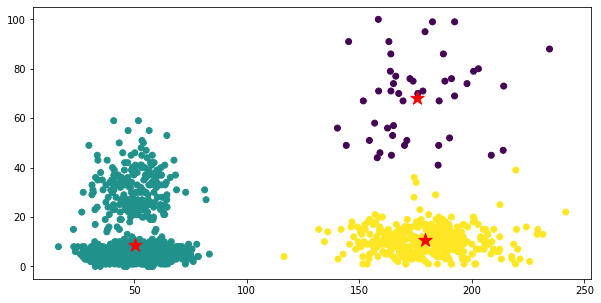

In [8]:
# Definimos la distancia euclidiana de una instancia x 
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):   
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

# Preparamos el vector donde guardamos la asignación de cada elemento 
# a un clúster (1,...,K)
Dyp = np.zeros(Dx.shape[0])

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='g')

# Flag de convergencia
iterando = True

while iterando:

    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()

    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.
        
        # P1
        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i], cDx)
        
        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y

    # Calcular los nuevos centros
    for k in range(K):
        # Necesitamos recalcular la media de las coordenadas de los elementos 
        # asignados a cada cluster. Recordad que cDx es la matriz donde almacenamos
        # los centroides, así que tendrá la forma (k, 2).

        # Para calcular la media de los elementos de un cluster, primero necesitamos
        # saber qué elementos pertenecen a ese cluster, lo cual podemos obtener usando
        # `Dyp` y `k`. Esto nos devolverá un vector de booleanos que podremos usar con
        # `Dx` para obtener las coordenadas de los elementos del cluster `k`. Una vez
        # disponemos de dichas coordenadas, simplemente tenemos que calcular la media.
        # Tened en cuenta que `np.mean` reduce la media a 1 único valor, y nosotros 
        # necesitamos 2 valores, uno para la coordenada x y otro para la y.
        # Podéis usar el argumento `axis` para indicarle a np.mean sobre qué dimensión
        # de la matriz de puntos `Dx` queréis realizar la media.
        
        # P2
        cDx[k,:] = np.mean(Dx[Dyp==k, :], axis=0)

    for k in np.arange(K):
        ax.plot( [cDx_ant[k,0], cDx[k,0]],[cDx_ant[k,1], cDx[k,1]], linestyle='-', marker='*', c='y')
    
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)

ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

In [9]:
from sklearn.metrics.cluster import contingency_matrix

def medida_error(mat):
    maxs = np.zeros(mat.shape[0])
    for l in np.arange(mat.shape[0]):
        maxs[l] = np.max(mat[l, :])
    maxs = np.sum(maxs)
    return 1 - maxs / np.sum(mat)

def medida_pureza(mat):
    totales = np.sum(mat, 0) / np.sum(mat)
    precision_kl = np.zeros(mat.shape[1])
    for k in np.arange(mat.shape[1]):
        precision_kl[k] = np.max(mat[:, k] / np.sum(mat[:, k]))
    return np.sum(totales * precision_kl)

def medida_precision(mat, l, k):
    return mat[l,k]/np.sum(mat[:,k])

def medida_recall(mat, l, k):
    return mat[l,k]/np.sum(mat[l,:])

def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    else:
        return 2*prec*rec/(prec+rec)

def medida_f1(mat):
    totales = np.sum(mat, 1) / np.sum(mat)
    f1 = np.zeros(mat.shape)
    for l in np.arange(mat.shape[0]):
        for k in np.arange(mat.shape[1]):
            f1[l, k] = medida_f1_especifica(mat, l, k)
    f1 = np.sum(totales * np.max(f1, axis=1))
    return f1

mC = contingency_matrix(Dy,Dyp)
mE = medida_error(mC)
mP = medida_pureza(mC)
mF1 = medida_f1(mC)

print('Matriz de confusión:\n', mC)
print(f'El valor del error cometido es = {mE}')
print(f'La pureza del agrupamiento obtenido es = {mP}')
print(f'El valor F1 es = {mF1}')

Matriz de confusión:
 [[  46    0    3]
 [   0 1393    0]
 [   0    0  346]
 [   0  211    0]]
El valor del error cometido es = 0.0015007503751875984
La pureza del agrupamiento obtenido es = 0.8929464732366184
El valor F1 es = 0.8684070304292459


El algoritmo de K-means está también disponible en sklearn, así que... ¿qué os parece si comprobamos si hemos hecho bien el trabajo?

Centros encontrados por...
el método programado:
[[175.6826087   68.36956522]
 [ 50.31548005   8.65710723]
 [179.3065043   10.59025788]]
el método de Sci-kit Learn:
[[175.6826087   68.36956522]
 [ 50.31548005   8.65710723]
 [179.3065043   10.59025788]]


Buen trabajo, tu implementación es correcta!




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


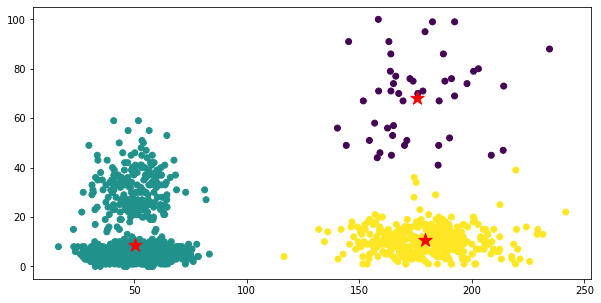

In [10]:
from sklearn.cluster import KMeans

# Se inicializa KMeans con el número de clústeres a buscar
modelo = KMeans(n_clusters=3, init=cDx)
# Se aprende el 
modelo = modelo.fit(Dx)
# Predicting the clusters
Dyp_sk = modelo.predict(Dx)
# Obtener los centros de los clústeres
cDx_sk = modelo.cluster_centers_

# Comparing with scikit-learn centroids
print('Centros encontrados por...')
print('el método programado:')
print(cDx)
print('el método de Sci-kit Learn:')
print(cDx_sk)
if np.allclose(cDx, cDx_sk):
  print('\n\nBuen trabajo, tu implementación es correcta!\n\n')
else:
  print('\n\nHay algún tipo de error en tu implementación, ¡fíjate bien!\n\n')
# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')

<hr>
<h2>K-mediods</h2>

K-medoids es un método de clustering muy similar a K-means en cuanto a que ambos agrupan las observaciones en K clusters, donde K es un valor preestablecido por el analista. 

La diferencia es que, en K-medoids, cada cluster está representado por una observación presente en el cluster (medoid), mientras que en K-means cada cluster está representado por su centroide, que se corresponde con el promedio de todas las observaciones del cluster pero con ninguna en particular.

Esto pasa habitualmente cuando los datos son heterogeneos (una mezcla de variables continuas y categóricas) y los centros (medias) no se pueden calcular.

Una definición más exacta del término medoid es: elemento dentro de un cluster cuya distancia (diferencia) promedio entre él y todos los demás elementos del mismo cluster es lo menor posible. Se corresponde con el elemento más central del cluster y por lo tanto puede considerarse como el más representativo. El hecho de utilizar medoids en lugar de centroides hace de K-medoids un método más robusto que K-means, viéndose menos afectado por outliers o ruido. A modo de idea intuitiva puede considerarse como la analogía entre media y mediana.

Como hemos visto, el algoritmo se plantea de manera equivalente a K-means, pero la selección de centros se realiza sobre el conjunto de datos de entrenamiento. Sólo con el objetivo de poder visualizar los resultados, usaremos un conjunto de datos continuo:


El dataset cargado tiene 767 instancias.


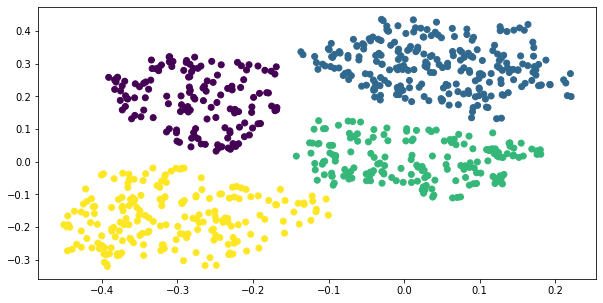

In [11]:
np.random.seed(17) # Fijamos una semilla para asegurar la reproducibilidad de la práctica

data_file_url = 'https://raw.githubusercontent.com/flifuehu/viu-unsupervised-learning/master/datasets/sinteticos/dataset_cuatro_separables_peque.csv'
D = np.array(pd.read_csv(data_file_url,header=0))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,0:2]
Dy = D[:,2]
print('El dataset cargado tiene',Dy.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

Los centros iniciales elegidos aleatoriamente son:
[[-0.355802   0.238831 ]
 [-0.0857934  0.33742  ]
 [-0.123291   0.026156 ]]


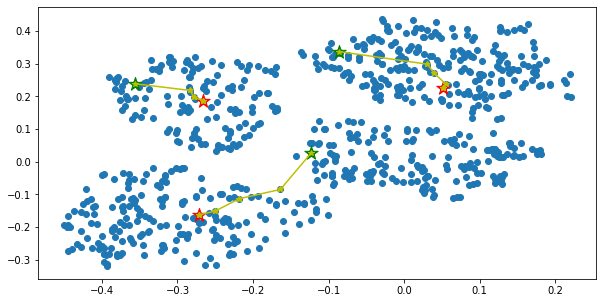

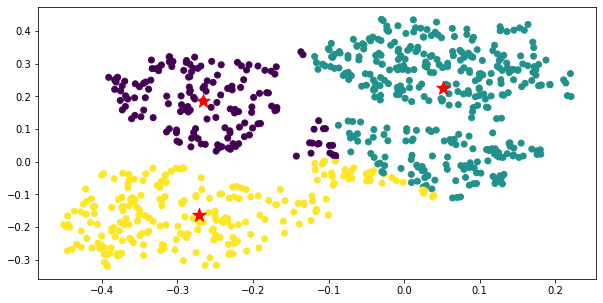

In [13]:
# Elegimos un número de clústeres a buscar
K = 3

# Elegimos los centros iniciales entre el conjunto de datos
cDx = Dx[np.random.choice(Dx.shape[0], K, replace=False),:]

print('Los centros iniciales elegidos aleatoriamente son:')
print(cDx)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='g')

# Definimos la distancia euclidiana de una instancia x 
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):   
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

def distancia_euclidiana(x, y):   
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

# Preparamos el vector donde guardamos la asignación de cada elemento 
# a un clúster (1,...,K)
Dyp = np.zeros(Dx.shape[0])

# Flag de convergencia
iterando = True

while iterando:

    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()

    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.
        
        # P3
        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i], cDx)
        
        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y

    # Calcular los nuevos centros
    for k in range(K):
        # En este caso lo que buscamos es el elemento del cluster que reduce la
        # distancia con respecto a todos los demás elementos. Para ello, calculamos
        # las distancias entre todos los elementos del cluster `k` y las almacenamos
        # en `mat`. 

        # Primero, obtenemos un vector binario indicando qué elementos de Dyp pertenecen a k
        indices_elementos_k = Dyp==k

        # Luego calculamos las distancias entre cada uno de los elementos de `Dx` 
        # que nuestra predicción dice que pertenecen al custer `k` y los demás.
        # Para ello, podemos usar la variable `indices_elementos_k` calculada
        # anteriormente para seleccionar los índices de `Dx` pertenecientes a `k`.
        
        # P4
        mat = matriz_distancias(Dx[indices_elementos_k, :], distancia_euclidiana)
        
        # Ahora buscamos el elemento con menor distancia dentro del 
        # cluster `k` y nos quedamos con su índice (usando np.argmin, que busca
        # el mínimo de un vector y nos devuelve su índice).
        
        # P5
        ic = np.where(Dyp==k)[0][np.argmin(np.sum(mat,axis=1))]

        # Asignamos como centro del cluster al elemento del cluster que ofrece
        # la menor distancia con respecto a todos los demás
        cDx[k,:] = Dx[ic,:]

    # Se muestra el desplazamiento de los centroides
    for k in np.arange(K):
        ax.plot( [cDx_ant[k,0], cDx[k,0]],[cDx_ant[k,1], cDx[k,1]], linestyle='-', marker='*', c='y')
    
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)

# Se muestran los centroides finales
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

<hr>
<h2>Elegir el mejor valor de K</h2>

Para elegir el mejor valor de K se suele usar la técnica del codo. Ésta consiste en probar diferentes valores de K y evaluar el agrupamientos según alguna medida de evaluación intrínseca (ya que se supone que no se conoce la verdad básica). En este ejemplo, se usan dos medidas diferentes: la medida de Silueta y la R cuadrado.


Text(0, 0.5, 'Medida de R cuadrado')

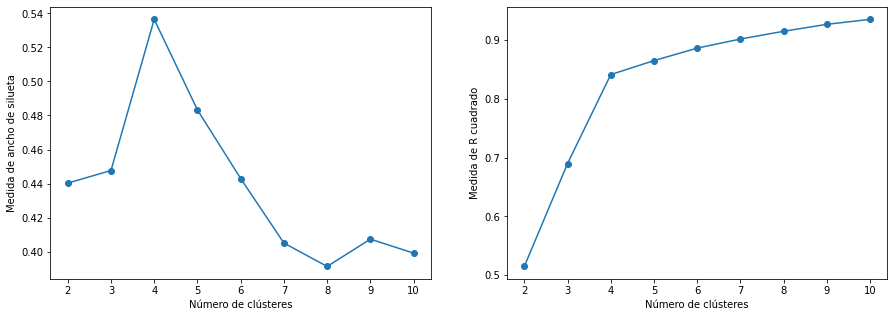

In [14]:
from sklearn.metrics import silhouette_score

def medida_R_cuadrado(X, Xyp, cXs):
    centros_dataset = np.mean(X,axis=0) 
    n_clusters = np.sort(np.unique(Xyp))
    distancia_a_centros_dataset = np.sum((X-centros_dataset)**2) 
    distancias_intracluster = np.zeros(n_clusters.size)
    for k in np.arange(n_clusters.size):
        distancias_intracluster[k] = np.sum((X[Xyp==n_clusters[k], :] - cXs[n_clusters[k], :])**2)
    distancia_intracluster = np.sum(distancias_intracluster)
    # P6
    return (distancia_a_centros_dataset - distancia_intracluster) / distancia_a_centros_dataset

rsilueta = np.zeros(9)
rrsquare = np.zeros(9)
for k in np.arange(2,11):
    modelo = KMeans(n_clusters=k, random_state=2)
    modelo = modelo.fit(Dx)
    Dyp_sk = modelo.predict(Dx)
    cDx_sk = modelo.cluster_centers_
    rsilueta[k-2] = silhouette_score(Dx, Dyp_sk)
    rrsquare[k-2] = medida_R_cuadrado(Dx, Dyp_sk, cDx_sk)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( np.arange(2,11),rsilueta, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de ancho de silueta")

ax[1].plot( np.arange(2,11),rrsquare, linestyle='-', marker='o')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Medida de R cuadrado")

Se observa que el punto con mayor puntuación es el K=4 en el caso de ancho de silueta. Con esto, podría ser suficiente. Sin embargo, si nos fijamos en la medida R cuadrado, se observa un marcado cambio de tendencia también en K=4. Este cambio es conocido como el codo. La práctica recomendada de este procedimiento indica que se debe seleccionar el punto donde se produzca el cambio de tendencia (el codo). 

Así, no cabe duda de que el mejor valor de K posible es 4, de acuerdo a ambas medidas.


<hr>
<h2>K-means++</h2>

Como ya sabemos, rel resultado de un clustering mediante K-means depende altamente de la inicialización de los centroides. La versión "vainilla" del k-means realiza esta inicialización de forma aleatoria, pero existen mejores formas de hacerlo.

En este apartado vamos a ver cómo lo hace el k-means++.

El dataset cargado tiene 1999 instancias.


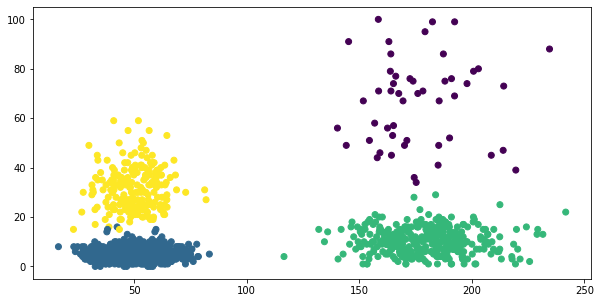

In [15]:
np.random.seed(31) # Fijamos una semilla para asegurar la reproducibilidad de la práctica
# Os recomiendo que cambiéis el seed y observéis como cambian los resultados
# Por ejemplo, con seed = 31, encontramos una agrupación mejor que con seed = 42

# Es importante que cada vez que ejecutéis el k-means++ re-ejecutéis todas las celdas
# desde esta incluída


data_file_url = 'https://raw.githubusercontent.com/flifuehu/viu-unsupervised-learning/master/datasets/sinteticos/dataset_cuatro_diferente_densidad.csv'
D = np.array(pd.read_csv(data_file_url,header=0))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,0:2]
Dy = D[:,2]
print('El dataset cargado tiene',Dy.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

El algoritmo K-means tiene un único parámetro: el número de clústeres (K). Una vez fijado este valor, el primer paso consiste en elegir unos centros iniciales.

In [16]:
# Elegimos un número de clústeres a buscar
K = 4

# Definimos la distancia euclidiana de una instancia x 
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):   
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

cDx = np.zeros(Dx.shape[1])
cDx.shape = (1,Dx.shape[1])

icenter = np.random.randint(Dx.shape[0])
cDx[0,:] = Dx[icenter,:]
auxDx = np.delete(Dx, icenter, 0)
print(auxDx.shape)

(1998, 2)


Una vez elegida aleatoriamente una instancia como primer centro, procedemos a muestrear, iterativamente, un nuevo centro entre el resto del conjunto de datos de manera proporcional a la distancia a los centros ya escogidos:

Los centros iniciales elegidos aleatoriamente son:
[[ 61.92   4.  ]
 [197.87  74.  ]
 [196.37  17.  ]
 [160.26  20.  ]]


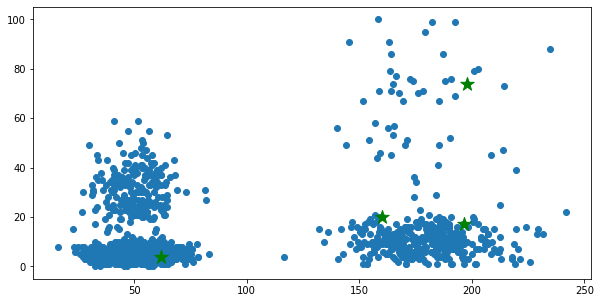

In [21]:
for k in np.arange(K-1):
    dist_min = np.zeros(auxDx.shape[0])
    for i in np.arange(auxDx.shape[0]):
        # Aquí calculamos la distancia de cada punto a todos los centros
        distancias_punto_a_centros = distancia_euclidiana_grupo(auxDx[i,:], cDx)
        # Y necesitamos quedarnos con la mínima
        dist_min[i] = np.min(distancias_punto_a_centros)
    # Ahora calculamos la probabilidad de acuerdo a la fórmula vista en las transparencias
    # P7
    probs = dist_min**2/np.sum(dist_min**2)
    cumprobs = np.cumsum(probs)
    icenter = np.where(cumprobs >= np.random.random_sample())[0][0]
    cDx= np.append(cDx, np.matrix(auxDx[icenter,:]), axis=0)
    auxDx = np.delete(auxDx, icenter, 0)

print('Los centros iniciales elegidos aleatoriamente son:')
print(cDx)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(np.array(cDx[:,0]),np.array(cDx[:,1]), marker='*', s=200, c='g')

Una vez escogidos los centros, el algoritmo K-means continúa como es habitual:

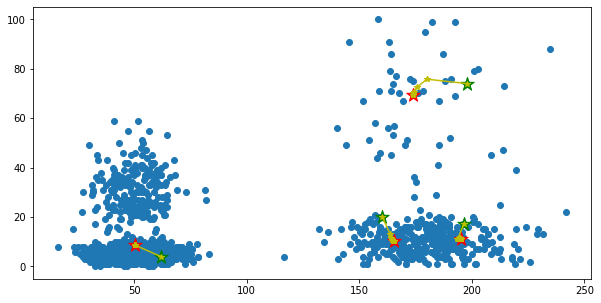

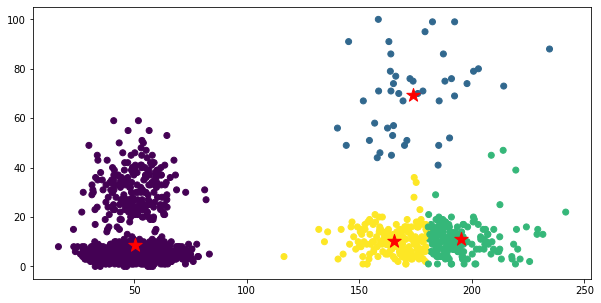

In [22]:
# Preparamos el vector donde guardamos la asignación de cada elemento 
# a un clúster (1,...,K)
Dyp = np.zeros(Dx.shape[0])

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(np.array(cDx[:,0]),np.array(cDx[:,1]), marker='*', s=200, c='g')

# Flag de convergencia
iterando = True

while iterando:

    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()

    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo(punto, grupo).
        
        # P8
        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i], cDx)
        
        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y

    # Calcular los nuevos centros
    for k in range(K):
        # Necesitamos recalcular la media de las coordenadas de los elementos 
        # asignados a cada cluster. Recordad que cDx es la matriz donde almacenamos
        # los centroides, así que tendrá la forma (k, 2).

        # Para calcular la media de los elementos de un cluster, primero necesitamos
        # saber qué elementos pertenecen a ese cluster, lo cual podemos obtener usando
        # `Dyp` y `k`. Esto nos devolverá un vector de booleanos que podremos usar con
        # `Dx` para obtener las coordenadas de los elementos del cluster `k`. Una vez
        # disponemos de dichas coordenadas, simplemente tenemos que calcular la media.
        # Tened en cuenta que `np.mean` reduce la media a 1 único valor, y nosotros 
        # necesitamos 2 valores, uno para la coordenada x y otro para la y.
        # Podéis usar el argumento `axis` para indicarle a np.mean sobre qué dimensión
        # de la matriz de puntos `Dx` queréis realizar la media.
        
        #P9
        cDx[k,:] = np.mean(Dx[Dyp==k, :], axis=0)

    for k in np.arange(K):
        ax.plot( [cDx_ant[k,0], cDx[k,0]],[cDx_ant[k,1], cDx[k,1]], linestyle='-', marker='*', c='y')
    
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)

ax.scatter(np.array(cDx[:,0]),np.array(cDx[:,1]), marker='*', s=200, c='r')

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(np.array(cDx[:,0]),np.array(cDx[:,1]), marker='*', s=200, c='r')

<hr>
<h2>Crea tus propios datasets de ejemplo</h2>

Python implementa la función make_blobs, que permite generar conjuntos de datos de manera sencilla especificando simplemente el número de ejemplos (n_samples), el número de dimensiones (n_features) y el número de clústeres (centers):


Text(0.5, 0.92, 'Clústeres y asignaciones predichos')

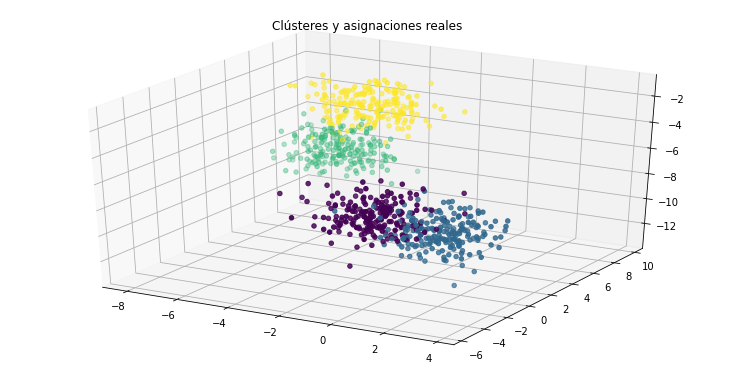

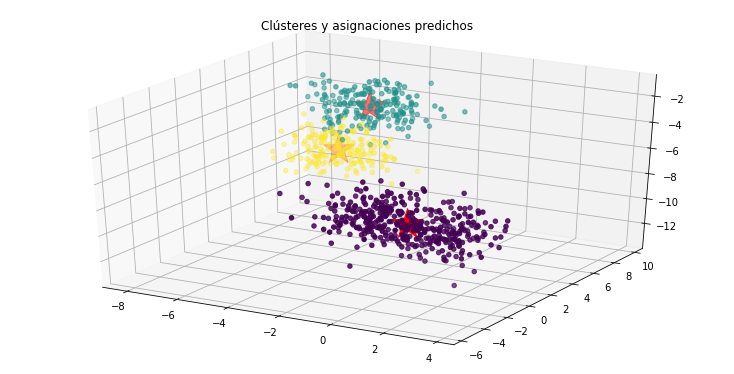

In [23]:
# Creamos un dataset con 3 dimensiones y 4 clústeres
Dx, Dy = make_blobs(n_samples=800, n_features=3, centers=4)

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:, 0], Dx[:, 1], Dx[:, 2], c=Dy)
ax.set_title("Clústeres y asignaciones reales")

modelo = KMeans(n_clusters=3)
modelo = modelo.fit(Dx)
Dyp_sk = modelo.predict(Dx)
cDx_sk = modelo.cluster_centers_

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:, 0], Dx[:, 1], Dx[:, 2], c=Dyp_sk)
ax.scatter(cDx_sk[:, 0], cDx_sk[:, 1], cDx_sk[:, 2], marker='*', c='r', s=1000)
ax.set_title("Clústeres y asignaciones predichos")